# Natural Language Processing Project
### README Repository Language Classification

---
## Executive Summary

1. Scraped README's from GitHub profiles
2. Built models to predict if primary language is:
    - Java
    - JavaScript  
    - Python
    - C++
3. Gradient Boost Classification model performed the best with a 76% accuracy.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import json

import main
import acquire
import prepare
import preprocessing
import model

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

## Acquire

- Manually explore sites in a web browser, and identify the relevant HTML elements from sports, data engineering, artificial intelligence, space exporation and biology written in Javascript, Python, Java and C++.
- Use the requests module to obtain the HTML from each repository.
- Use BeautifulSoup to parse the HTML and obtain the text/data that we want.
- Parse the text of README's, language, watchers, stars, forks and commits.
- Saved raw data as a json file.

In [ ]:
# create a list of urls using a list of topics
pages = acquire.get_url_pages()

In [ ]:
print(f'There are {len(pages)} unique search topics')
pages

In [ ]:
# obtaining a list of 10 urls per page in 'pages' list
repository_links = acquire.get_url_links(pages)

In [ ]:
# scraping readmes
data = acquire.scrape_repos(repository_links)
# since the readmes stop scraping at 90 we had to
# split the data into sections of 90 and extend them into one long list
# from there we saved the file as such below to create a final list of 589

In [ ]:
# putting readme's in a df
df = pd.DataFrame(data)

In [ ]:
#saves the readme's as a json file for further use later
#df.to_json('readmes.json')

## Prepare

- Cleaned the `language`, `watchers`, `stars`, `forks` and `commits` columns of uneccessary text and changed data types as needed.
- Normalized, tokenized, stemmed, lemmatized, and removed stop words from the README column.
- Split into Train, Validate and Test datasets.

In [2]:
df = pd.read_json('data/raw/readmes.json')

In [3]:
df

,language,readme,watchers,stars,forks,commits
0,JavaScript 98.7,"FCC League-For-Good\nThis is a free, open-sour...",28,161,98,411
1,JavaScript 97.4,nba\nNode.js client for nba.com API endpoints\...,49,621,150,294
2,JavaScript 60.0,SportsLeague: Laravel 5.4 based system for var...,6,26,48,9
3,JavaScript 63.6,Team Colors\n\nTeam Colors is a reference of H...,11,123,58,184
4,JavaScript 39.3,vue-sports\n\nA Vue.js project\n\n仿凤凰新闻体育板块+赛事...,5,93,42,16
...,...,...,...,...,...,...
584,C++ 91.1,A Cocos2d-x Asynchronous Http Request Libray T...,8,58,10,412
585,C++ 53.4,Setup instruction (OS X)\n\n\nGet dependencies...,5,58,22,28
586,C++ 86.2,Launchy\nLaunchy is a free utility designed to...,12,58,9,728
587,C++ 58.0,Launchy\nLaunchy is a free utility designed to...,9,57,18,3


In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.prep_readme_data(df)

In [5]:
X_train.shape, X_validate.shape, X_test.shape

((353, 25010), (118, 25010), (118, 25010))

## Exploration
- Turn the readme column into a panda series and create a dataframe with the word counts for each language
- Visualize the proportion of the most frequent words by language
- Create bigrams and trigrams
- Create word clouds to visualize the most frequent words used
- Find the most frequent named entities in the corpus

In [6]:
X_train = X_train.join(y_train)

In [7]:
X_train

,readme,lemmatized,clean,words,watchers,stars,forks,commits,00,000,...,zur,zurb,zweifel,zwischen,zwitch,zxing,zxy,zypper,zzzzzz,language
494,SCC — Simple C++\n\nSCC is C++ snippets evalu...,scc simple c scc is c snippet evaluator at she...,scc simple c scc c snippet evaluator shell pro...,"[scc, simplesccsnippet, evaluator, shell, prom...",6,62,4,843,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C++
54,SportScanner\n\nThis project is no longer acti...,sportscanner this project is no longer activel...,sportscanner project longer actively maintaine...,"[sportscanner, project, longer, actively, main...",15,52,22,64,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Python
105,"PerfectBody\nThat is the Android app, which is...",perfectbody that is the android app which is u...,perfectbody android app useful people want beg...,"[perfectbody, android, app, useful, people, wa...",2,6,6,10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Java
44,\n\n\nSynBioHub is a Web-based repository for ...,synbiohub is a webbased repository for synthet...,synbiohub webbased repository synthetic biolog...,"[synbiohub, webbased, repository, synthetic, b...",8,39,18,3023,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JavaScript
5,\nCourtside: pick up sports app.\nMake game pl...,courtside pick up sport app make game plan and...,courtside pick sport app make game plan let fr...,"[courtside, pick, sport, app, make, game, plan...",3,87,25,70,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JavaScript
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,效果展示\n\n\n详解\nhttp://yueban.github.io/2015/04/...,httpyuebangithubio20150428materialdesigntoolbar,httpyuebangithubio20150428materialdesigntoolbar,[httpyuebangithubio20150428materialdesigntoolbar],7,110,26,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Java
215,Faster R-CNN\nThis repo has been deprecated. H...,faster rcnn this repo ha been deprecated here ...,faster rcnn repo deprecated complete code trai...,"[faster, rcnn, repo, deprecated, complete, cod...",23,285,92,67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Python
435,Zippopotamus Cloud\n\nAPI Moved\nOur full crow...,zippopotamus cloud api moved our full crowdsou...,zippopotamus cloud api moved full crowdsource ...,"[zippopotamus, cloud, api, moved, full, crowds...",12,105,56,44,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Python
74,\nSimple AI\nProject home: http://github.com/s...,simple ai project home httpgithubcomsimpleaite...,simple ai project home httpgithubcomsimpleaite...,"[simple, ai, project, home, httpgithubcomsimpl...",112,883,229,747,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Python


In [16]:
js_words = prepare.clean_explore(''.join(X_train[X_train.language == 'JavaScript'].clean))
python_words = prepare.clean_explore(''.join(X_train[X_train.language == 'Python'].clean))
java_words = prepare.clean_explore(''.join(X_train[X_train.language == 'Java'].clean))
c_words = prepare.clean_explore(''.join(X_train[X_train.language == 'C++'].clean))
all_words = prepare.clean_explore(''.join(X_train.clean))

In [17]:
js_freq = pd.Series(js_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [18]:
word_counts = (pd.concat([all_freq, js_freq, python_freq, java_freq, c_freq ], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'python', 'java', 'c++'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head(20)

,all,javascript,python,java,c++
0,119,14,53,36,16
00,4,2,0,2,0
000,1,1,0,0,0
0000,1,1,0,0,0
000000,1,0,1,0,0
001,4,2,0,2,0
0010,3,1,0,2,0
0011,2,0,0,2,0
0012,2,0,0,2,0
002,3,1,0,2,0


In [19]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,python,java,c++
use,666,216,168,162,120
file,620,169,238,111,102
install,514,223,159,30,102
data,511,110,251,81,69
using,507,125,154,98,130
run,459,181,117,55,106
project,422,81,147,142,52
example,402,125,131,63,83
9,396,12,15,247,122
code,391,98,123,67,103


---
## Modeling


60-20-20 Split

### Preprocessing

<strong>TF-IDF</strong><br>
Term Frequency - Inverse Document Frequency

<strong>MinMaxScaler</strong>

In [ ]:
pd.options.display.float_format = '{:.0%}'.format

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model.model_data('data/model')

## Train

##### Baseline Accuracy

In [ ]:
baseline_prediction = y_train.value_counts().nlargest(1).index[0]

baseline_accuracy = (y_train == baseline_prediction).mean()
print(f"The baseline accuracy is {baseline_accuracy:.0%}")
print(f"{baseline_prediction}")

#### Classification Models

In [ ]:
### Ridge Classifier

clf = RidgeClassifierCV()
clf.fit(X_train, y_train)
clf_train_acc = clf.score(X_train, y_train)

### Random Forest

tree = RandomForestClassifier()
tree.fit(X_train, y_train)
tree_train_acc = tree.score(X_train, y_train)

### Gradient Boost

ml = GradientBoostingClassifier()
ml.fit(X_train, y_train)
ml_train_acc = ml.score(X_train, y_train)

In [ ]:
train_scores = model.model_scores(clf_train_acc,
                                  tree_train_acc,
                                  ml_train_acc,
                                  modeling_set='train')

In [ ]:
train_scores

## Validate

In [ ]:
### Ridge Classifier
clf_val_acc = clf.score(X_validate, y_validate)

### Random Forest
tree_val_acc = tree.score(X_validate, y_validate)

### Gradient Boost
ml_val_acc = ml.score(X_validate, y_validate)

In [ ]:
validate_scores = model.model_scores(clf_val_acc,
                                     tree_val_acc,
                                     ml_val_acc,
                                     modeling_set='validate')

In [ ]:
validate_scores

## Test

In [ ]:
### Gradient Boost

ml_test_acc = ml.score(X_test, y_test)

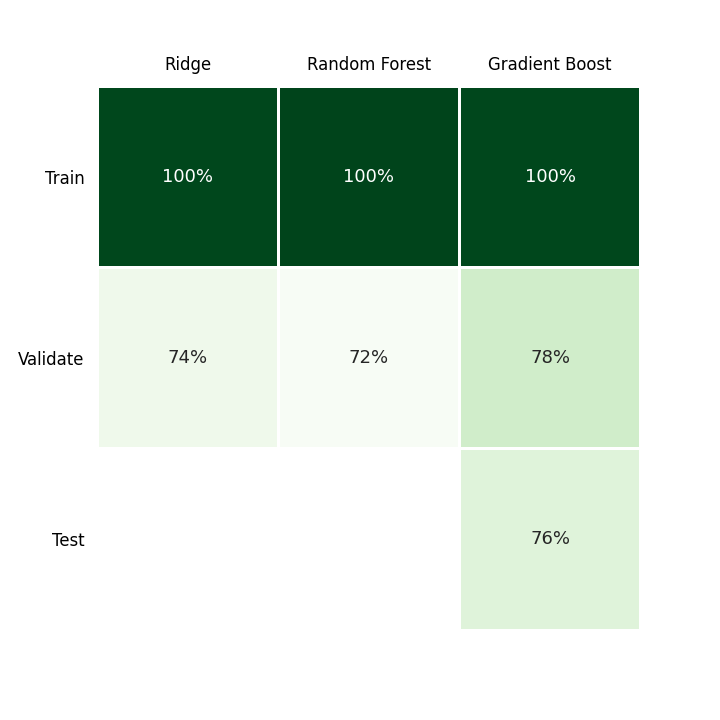

---
## Evaluation

Model Accuracy
- Confusion matrix
- Classification report
- ROC Curve

In [ ]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

train['predicted'] = ml.predict(X_train)
validate['predicted'] = ml.predict(X_validate)
test['predicted'] = ml.predict(X_test)

\<insert comments>

In [ ]:
print("Training Set")
print("")
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

\<insert comments>

In [ ]:
print("Validation Set")
print("")
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted))

\<insert comments>

In [ ]:
print("Test Set")
print("")
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

## Appendix

In [ ]:
# tf-idf L2 Normalization

for i in range(3):
    print(f"Training observation {i+1}: L2 Norm --- Euclidian distance = {sum(X_train.iloc[i]**2):.0f}")